In [67]:
from google.colab import drive

drive.mount('/content/gdrive')
import pandas
import tensorflow as tf
import numpy as np
import math as m
import matplotlib.pyplot as plt
import tensorflow.nn as nn
from sklearn.preprocessing import normalize

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df = pandas.read_csv('/content/gdrive/My Drive/Colab Notebooks/Iris.csv')

#df = df.drop('Iris-setosa',1)

#print(df)

#df.to_csv('/content/gdrive/My Drive/Colab Notebooks/Iris.csv',header=False,index=False)

data = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/Iris.csv',delimiter=',',unpack=True,dtype='float32')

In [69]:
print(data.shape)
print(type(data))
data = np.transpose(data)
data = normalize(data)

(4, 149)
<class 'numpy.ndarray'>


In [70]:
print(type(data))
print(data.shape)
print(data)

<class 'numpy.ndarray'>
(149, 4)
[[0.82813287 0.5070201  0.23660938 0.03380134]
 [0.8053331  0.5483119  0.2227517  0.03426949]
 [0.80003023 0.53915083 0.26087943 0.03478393]
 [0.790965   0.5694948  0.2214702  0.0316386 ]
 [0.784175   0.56634855 0.24686989 0.05808703]
 [0.78010935 0.5766026  0.23742458 0.0508767 ]
 [0.8021849  0.54548573 0.24065547 0.0320874 ]
 [0.80642366 0.53150654 0.25658935 0.03665562]
 [0.8180312  0.5175299  0.2504177  0.01669451]
 [0.80373514 0.5507074  0.22325976 0.02976797]
 [0.78699106 0.55745196 0.26233035 0.03279129]
 [0.8230722  0.5144201  0.24006271 0.01714734]
 [0.8025126  0.5598925  0.20529392 0.01866308]
 [0.8112086  0.5594542  0.16783626 0.02797271]
 [0.7738111  0.5973279  0.20363452 0.05430254]
 [0.79428947 0.5736535  0.19121782 0.05883626]
 [0.8032741  0.55126655 0.22050662 0.04725142]
 [0.8068282  0.5378855  0.240633   0.04246465]
 [0.77964884 0.58091486 0.2293085  0.0458617 ]
 [0.8173379  0.5146202  0.2573101  0.03027177]
 [0.78591853 0.5701762  0.2

In [0]:
x_vals = np.array([x[0:3] for x in data])
y_vals = np.array([x[3] for x in data])

In [72]:
print(x_vals)
print(y_vals)

[[0.82813287 0.5070201  0.23660938]
 [0.8053331  0.5483119  0.2227517 ]
 [0.80003023 0.53915083 0.26087943]
 [0.790965   0.5694948  0.2214702 ]
 [0.784175   0.56634855 0.24686989]
 [0.78010935 0.5766026  0.23742458]
 [0.8021849  0.54548573 0.24065547]
 [0.80642366 0.53150654 0.25658935]
 [0.8180312  0.5175299  0.2504177 ]
 [0.80373514 0.5507074  0.22325976]
 [0.78699106 0.55745196 0.26233035]
 [0.8230722  0.5144201  0.24006271]
 [0.8025126  0.5598925  0.20529392]
 [0.8112086  0.5594542  0.16783626]
 [0.7738111  0.5973279  0.20363452]
 [0.79428947 0.5736535  0.19121782]
 [0.8032741  0.55126655 0.22050662]
 [0.8068282  0.5378855  0.240633  ]
 [0.77964884 0.58091486 0.2293085 ]
 [0.8173379  0.5146202  0.2573101 ]
 [0.78591853 0.5701762  0.23115252]
 [0.7757707  0.6071249  0.16864581]
 [0.80597794 0.52151513 0.26865932]
 [0.77611405 0.5497474  0.3072118 ]
 [0.82647455 0.49588472 0.26447186]
 [0.79778206 0.5424918  0.25529027]
 [0.8064196  0.5427825  0.23262106]
 [0.8160943  0.5336001  0.21

In [0]:
train_indices = np.random.choice(len(x_vals),round(len(x_vals)*0.8),replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]


In [0]:
x_data = tf.placeholder(shape=[None,3], dtype = tf.float32)
y_target = tf.placeholder(shape=[None,1],dtype = tf.float32)

H_nodes = 10
batch_size = 50

W1 = tf.Variable(tf.random_normal(shape = [3,H_nodes]))
b1 = tf.Variable(tf.random_normal(shape = [H_nodes]))

W2 = tf.Variable(tf.random_normal(shape = [H_nodes,1]))
b2 = tf.Variable(tf.random_normal(shape = [1]))

H_out = tf.nn.relu(tf.add(tf.matmul(x_data,W1),b1))
L_out = tf.nn.relu(tf.add(tf.matmul(H_out,W2),b2))

loss = tf.reduce_mean(tf.square(y_target - L_out))
#loss = tf.nn.l2_loss(y_target - L_out)

optimizer = tf.train.GradientDescentOptimizer(0.0001)
train_op = optimizer.minimize(loss)

In [0]:
sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)



In [0]:
saver = tf.train.Saver()
loss_vec = []
test_loss = []


100 0.099462375 0.07337008
200 0.081402496 0.066908635
300 0.078307875 0.0615115
400 0.07317526 0.057007026
500 0.067878716 0.053167462
600 0.049172796 0.050015077
700 0.04648589 0.047311347
800 0.050628338 0.045043804
900 0.035909515 0.043110378
1000 0.043527126 0.041488636
1100 0.049234714 0.0400951
1200 0.037824605 0.03894639
1300 0.03290845 0.03789436
1400 0.036418363 0.037000656
1500 0.037624903 0.036222745
1600 0.035699107 0.03555006
1700 0.03606869 0.03497083
1800 0.035922572 0.034466807
1900 0.029903207 0.034023333
2000 0.03142565 0.033635292


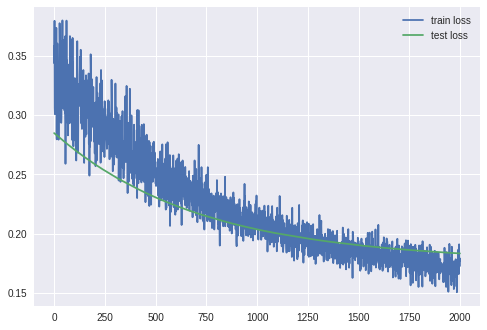

In [77]:
for i in range(2000):
  rand_index = np.random.choice(len(x_vals_train), size=batch_size)
  rand_x = x_vals_train[rand_index]
  rand_y = np.transpose([y_vals_train[rand_index]])
  sess.run(train_op, feed_dict={x_data:rand_x, y_target:rand_y})
  sess.run(train_op, feed_dict={x_data:x_vals_train, y_target:np.transpose([y_vals_train])})
  temp_loss = sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
  
  loss_vec.append(np.sqrt(temp_loss))
  
  test_temp_loss = sess.run(loss, feed_dict={x_data:x_vals_test, y_target:np.transpose([y_vals_test])}) 
  
  test_loss.append(np.sqrt(test_temp_loss))
  
  if (i+1)%100==0:
    print(i+1, temp_loss, test_temp_loss)
    

plt.plot(loss_vec,label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()